In [1]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

## Bootstrap Confidence Intervals ##

Steps:

||Step|Example|
|---:|:---|:---
1.|Ask Question |What is the weight of babies born to smoking mothers?|
2.|Get sample data|Get weights of 100 babies born to smokers|
3.|Choose a statistic|Mean baby weight |
4.|Calculate the statistic of the original sample|The mean weight of the 100 babies is 114 oz.
5.|Bootstrap the sample and calculate the statistic on the bootstrap sample|The mean weight of the 100 babies in bootstrap sample 1 is 115.3 oz.
6.|Repeat over many bootstrap samples and record the results|
7.|Plot the distrubution and observe the uncertainty inherent from samples of a given size|
8.|Find the 2.5 and 97.5 percentiles of the statistic over all of the bootstrap samples to compute a 95% confidence interval for the population parameter.



## Put useful functions in the cell below

In [2]:
def sample_stat_without_replacement(table,samp_size):
    our_sample = table.sample(samp_size, with_replacement=False)
    if test_stat == 1:
        return np.mean(our_sample.column(0))
    else:
        return np.median(our_sample.column(0))

def sample_stat_with_replacement(sample):
    single_sample = sample.sample(with_replacement = True)
    if test_stat == 1:
        return np.mean(single_sample.column(0))
    else:
        return np.median(single_sample.column(0))
    

### Step 1. Ask Question

What is the median weight of babies born to smokers?

### Step 2. Get Sample Data

Read in the Data.  The data might be population data or sample data. Be aware of the diiference. If the data is population data, you will need to create a sample from the population data.

In [3]:
# This is population data
births = Table.read_table('http://faculty.ung.edu/rsinn/baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


### Select the data of interest

Select the babies born to smokers

In [4]:
pop_data = births.where('Maternal Smoker',True).select('Birth Weight')

In [5]:
pop_data.show(3)

Birth Weight
128
108
143


In [6]:
pop_mean = np.mean(pop_data.column(0))
print('The mean of the population data is', pop_mean )
pop_median = np.median(pop_data.column(0))
print('The median of the population data is', pop_median )

The mean of the population data is 113.81917211328977
The median of the population data is 115.0


### Choose a test statistic

### set test_stat = 1 for mean, 0 for median

In [7]:
test_stat = 1
# test_stat = 0



#### Get a sample if  the data above is population data.
Choose a sample size and sample WITHOUT replacement.

In [8]:
sample_size = 200


original_sample = pop_data.sample(sample_size, with_replacement=False)
original_sample_mean = np.mean(original_sample.column(0))
original_sample_median = np.median(original_sample.column(0))

print('The mean of the sample data is', original_sample_mean )
pop_median = np.median(pop_data.column(0))
print('The median of the sample data is', original_sample_median)

if test_stat == 1:
    sample_stat = original_sample_mean
    stat_label = 'Means'
else:
    sample_stat = original_sample_median
    stat_label = 'Medians'
        


The mean of the sample data is 113.24
The median of the sample data is 114.5


### This sample is ALL you know about the population. What can you infer about the population from this sample?

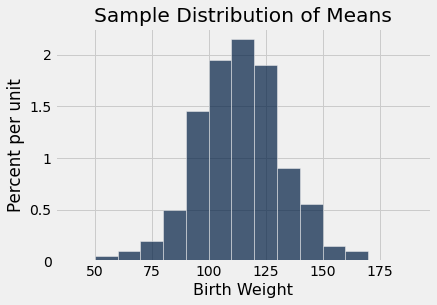

In [9]:
hist_bins = np.arange(40, 200, 10)
original_sample.hist(bins=hist_bins)
plots.title('Sample Distribution of ' + stat_label);

### Variability of the Estimate / Quantifying Uncertainty

#### Since all samples of the population are likely to be different, there is inherent uncertainty in what we can infer from a single sample of the population.

### Bootstrap

#### Assuming that the sample is " large enough" , and that it is representative of the population, you can generate "bootstrapped" samples by resampling the original sample, WITH replacement. 

These new samples can be use to determine the uncertainty that results fom using a sample of a given size to infer something about a population parameter.

Our Sample Statistic =        113.24


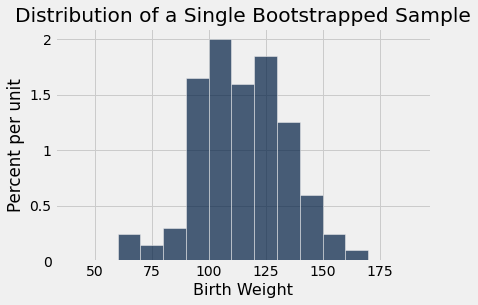

In [10]:
# Take a bootstrap (re)sample of size sample_size, WITH replacement
boot_sample = original_sample.sample(sample_size, with_replacement=True)
boot_sample.hist(bins = hist_bins)
plots.title('Distribution of a Single Bootstrapped Sample' );

# print("Population Median =       ", pop_median)
print("Our Sample Statistic =       ", sample_stat)

In [11]:
bootstrap_stats = make_array()

for i in np.arange(10000):
    new_stat = sample_stat_with_replacement(original_sample)
    bootstrap_stats = np.append(bootstrap_stats, new_stat)


## Confidence Intervals

The estimate of the population statistic is between  110.685  and  115.77
This was estimated using a sample of size  200 and a confidence level of 95  %


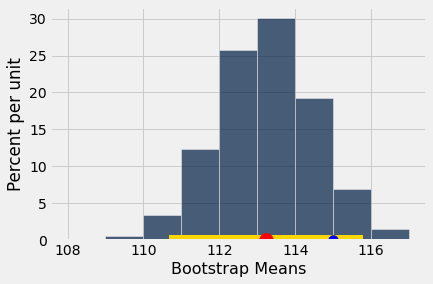

In [12]:
# Make an interval based on the middle 95% of bootstrap samples
confidence_level = 95

left = percentile((100 - confidence_level)/2, bootstrap_stats)
right = percentile(50 + confidence_level/2 , bootstrap_stats)

print('The estimate of the population statistic is between ', left,' and ', right)
print('This was estimated using a sample of size ', sample_size, 'and a confidence level of', confidence_level,' %')

# print(left)
# print(right)

start = round(min(bootstrap_stats))
stop = round(max(bootstrap_stats))
stat_bins = np.arange(start,stop,1)

Table().with_column(
    'Bootstrap ' + stat_label, bootstrap_stats
).hist('Bootstrap ' + stat_label, bins=stat_bins)


plots.plot([left, right], [0,0], color="gold",lw=10, zorder=1);
plots.scatter(sample_stat, 0, color="red", s = 200,zorder=2);
plots.scatter(pop_median, 0, color="blue", s = 100,zorder=2);

### Repeat the process 50 times

The average width of all 50 confidence intervals is returned. This might be useful for investigating how the width of the confidence interval depends on sample size, especially for test statistics such as the median, which do not play nicely with the central limit theorem.

In [13]:
# width = make_array()

# for j in np.arange(50):
    
#     bootstrap_medians = make_array()
#     for i in np.arange(1000):
        
#         new_median = one_bootstrap_median(mySample, myLabel)
#         bootstrap_medians = np.append(bootstrap_medians, new_median)
        
#     left = percentile(2.5, bootstrap_medians)
#     right = percentile(97.5, bootstrap_medians)    
#     width = np.append(width, right - left)
    
# print(' The mean width of the 95% confidence intervals for samples of size ', 
#       sample_size, ' is ',np.mean(width))
    